# Creating Sample Datasets for Correlation Analysis

This notebook provides functions to generate sample datasets for three types of correlations:
- Positive correlation
- Negative correlation
- No correlation (random relationship)

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Function 1: Positive Correlation Dataset

Creates a dataset where two variables have a positive correlation. Default example: height and weight.

In [2]:
def create_positive_correlation_data(
    n_observations=100, height_variance=0.04, weight_variance=0.5
):
    """
    Create a dataset with positive correlation between height (cm) and weight (kg).

    Parameters:
    - n_observations: number of data points to generate
    - height_variance: variance in the height data (higher values = more scattered)
    - weight_variance: variance in the weight data (higher values = more scattered)

    Returns:
    - DataFrame with 'height' and 'weight' columns
    """
    # Generate height data (normal distribution around 170cm with specified variance)
    heights = np.random.normal(170, np.sqrt(height_variance) * 10, n_observations)

    # Calculate expected weights based on height (simplified BMI-like relationship)
    # Formula approximates: weight = 0.4 * (heights - 100) + random noise
    base_weights = 0.4 * (heights - 100)

    # Add some random variation to weights
    weights = base_weights + np.random.normal(
        0, np.sqrt(weight_variance), n_observations
    )

    # Create a DataFrame
    df = pd.DataFrame({"height (cm)": heights, "weight (kg)": weights})

    return df

## Function 2: Negative Correlation Dataset

Creates a dataset where two variables have a negative correlation. Default example: study hours and procrastination time.

In [3]:
def create_negative_correlation_data(
    n_observations=100, study_variance=1.5, procrastination_variance=0.8
):
    """
    Create a dataset with negative correlation between study hours and procrastination time.

    Parameters:
    - n_observations: number of data points to generate
    - study_variance: variance in the study hours (higher values = more scattered)
    - procrastination_variance: variance in procrastination time (higher values = more scattered)

    Returns:
    - DataFrame with 'study_hours' and 'procrastination_hours' columns
    """
    # Total available hours (assume 12 hours available per day)
    total_hours = 12

    # Generate study hours (normal distribution around 6 hours with specified variance)
    study_hours = np.random.normal(6, np.sqrt(study_variance), n_observations)
    study_hours = np.clip(
        study_hours, 1, 11
    )  # Ensure study hours stay in reasonable range

    # Calculate procrastination time with negative correlation to study hours
    # plus some random variation
    base_procrastination = total_hours - study_hours
    procrastination_hours = base_procrastination + np.random.normal(
        0, np.sqrt(procrastination_variance), n_observations
    )
    procrastination_hours = np.clip(
        procrastination_hours, 1, 11
    )  # Keep values reasonable

    # Create a DataFrame
    df = pd.DataFrame(
        {"study_hours": study_hours, "procrastination_hours": procrastination_hours}
    )

    return df

## Function 3: No Correlation Dataset

Creates a dataset where two variables have no meaningful correlation. Default example: coffee consumption and typing speed.

In [4]:
def create_no_correlation_data(
    n_observations=100, coffee_variance=1.5, typing_variance=10
):
    """
    Create a dataset with no correlation between coffee consumption and typing speed.

    Parameters:
    - n_observations: number of data points to generate
    - coffee_variance: variance in coffee consumption (higher values = more scattered)
    - typing_variance: variance in typing speed (higher values = more scattered)

    Returns:
    - DataFrame with 'coffee_cups' and 'typing_speed_wpm' columns
    """
    # Generate coffee consumption data (normal distribution around 3 cups with specified variance)
    coffee_cups = np.random.normal(3, np.sqrt(coffee_variance), n_observations)
    coffee_cups = np.clip(coffee_cups, 0, 8)  # Keep values in reasonable range

    # Generate typing speed data (normal distribution around 60 WPM with specified variance)
    # Completely independent of coffee consumption
    typing_speed = np.random.normal(60, np.sqrt(typing_variance), n_observations)
    typing_speed = np.clip(typing_speed, 20, 100)  # Keep values in reasonable range

    # Create a DataFrame
    df = pd.DataFrame({"coffee_cups": coffee_cups, "typing_speed_wpm": typing_speed})

    return df

## Examples and Visualizations

Let's create and visualize examples of each correlation type.

In [5]:
# Create datasets
positive_df = create_positive_correlation_data()
negative_df = create_negative_correlation_data()
no_corr_df = create_no_correlation_data()

# Print correlation coefficients
print(
    "Positive correlation coefficient:",
    round(positive_df["height (cm)"].corr(positive_df["weight (kg)"]), 3),
)
print(
    "Negative correlation coefficient:",
    round(negative_df["study_hours"].corr(negative_df["procrastination_hours"]), 3),
)
print(
    "No correlation coefficient:",
    round(no_corr_df["coffee_cups"].corr(no_corr_df["typing_speed_wpm"]), 3),
)

Positive correlation coefficient: 0.77
Negative correlation coefficient: -0.83
No correlation coefficient: 0.059


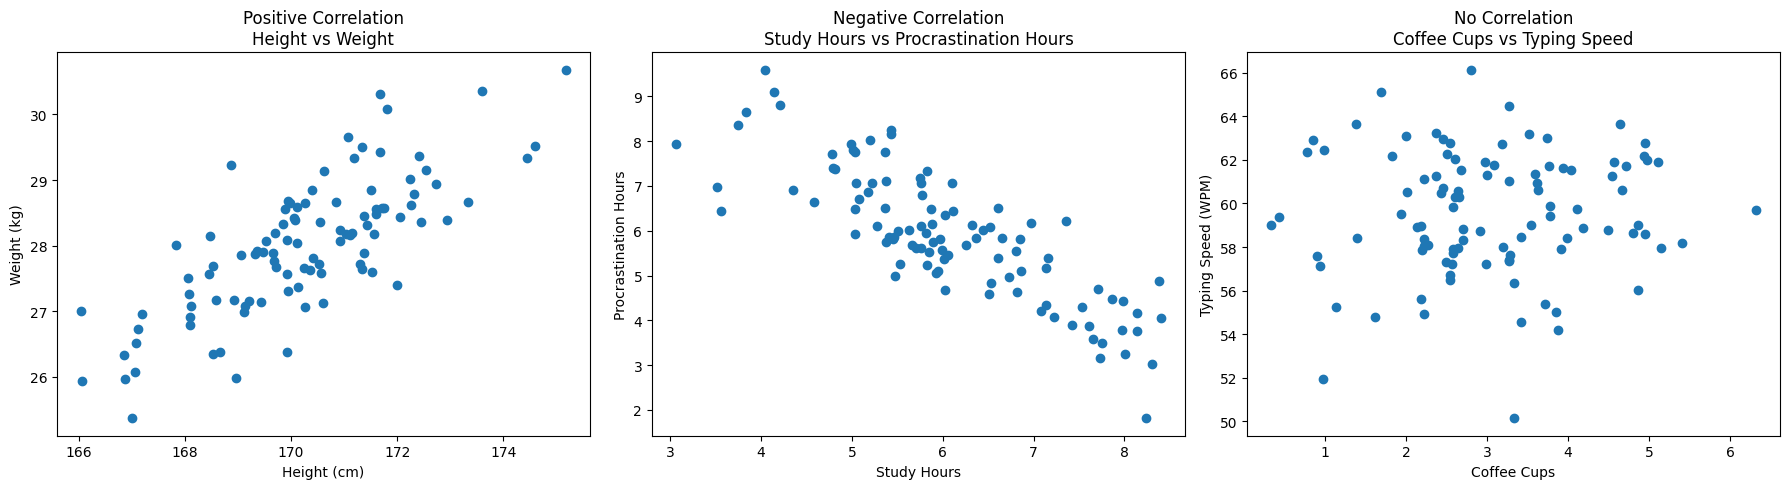

In [6]:
# Create a figure with 3 subplots to visualize each correlation type
plt.figure(figsize=(18, 5))

# Plot 1: Positive correlation
plt.subplot(1, 3, 1)
plt.scatter(positive_df["height (cm)"], positive_df["weight (kg)"])
plt.title("Positive Correlation\nHeight vs Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")

# Plot 2: Negative correlation
plt.subplot(1, 3, 2)
plt.scatter(negative_df["study_hours"], negative_df["procrastination_hours"])
plt.title("Negative Correlation\nStudy Hours vs Procrastination Hours")
plt.xlabel("Study Hours")
plt.ylabel("Procrastination Hours")

# Plot 3: No correlation
plt.subplot(1, 3, 3)
plt.scatter(no_corr_df["coffee_cups"], no_corr_df["typing_speed_wpm"])
plt.title("No Correlation\nCoffee Cups vs Typing Speed")
plt.xlabel("Coffee Cups")
plt.ylabel("Typing Speed (WPM)")

plt.tight_layout()
plt.show()

## Alternative Visualization with Seaborn

Let's also create regression plots to better visualize the correlations.

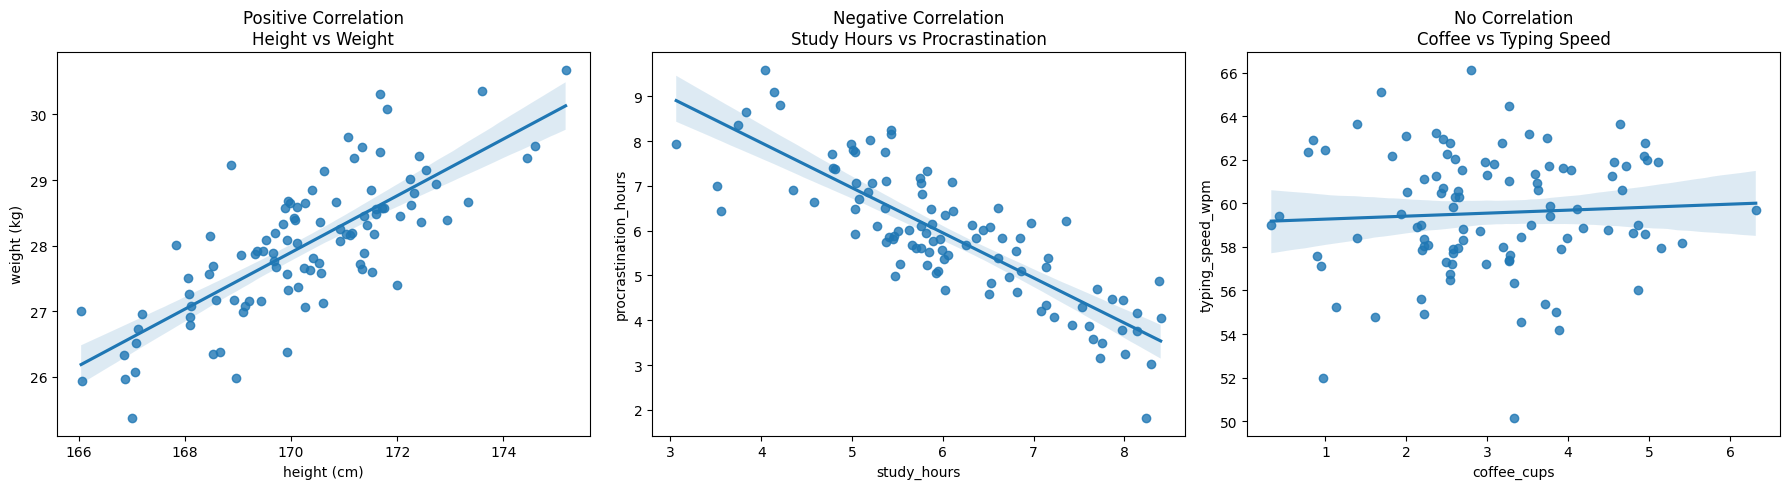

In [7]:
plt.figure(figsize=(18, 5))

# Plot 1: Positive correlation
plt.subplot(1, 3, 1)
sns.regplot(x="height (cm)", y="weight (kg)", data=positive_df)
plt.title("Positive Correlation\nHeight vs Weight")

# Plot 2: Negative correlation
plt.subplot(1, 3, 2)
sns.regplot(x="study_hours", y="procrastination_hours", data=negative_df)
plt.title("Negative Correlation\nStudy Hours vs Procrastination")

# Plot 3: No correlation
plt.subplot(1, 3, 3)
sns.regplot(x="coffee_cups", y="typing_speed_wpm", data=no_corr_df)
plt.title("No Correlation\nCoffee vs Typing Speed")

plt.tight_layout()
plt.show()

## Example with Custom Parameters

Let's create datasets with custom parameters to see how they affect the correlation.

In [8]:
# Create datasets with more observations and different variances
large_positive_df = create_positive_correlation_data(
    n_observations=100, height_variance=0.09, weight_variance=10
)
large_negative_df = create_negative_correlation_data(
    n_observations=100, study_variance=3, procrastination_variance=2.5
)
large_no_corr_df = create_no_correlation_data(
    n_observations=100, coffee_variance=3, typing_variance=30
)

# Print correlation coefficients for the larger datasets
print(
    "Positive correlation coefficient (larger dataset):",
    round(large_positive_df["height (cm)"].corr(large_positive_df["weight (kg)"]), 3),
)
print(
    "Negative correlation coefficient (larger dataset):",
    round(
        large_negative_df["study_hours"].corr(
            large_negative_df["procrastination_hours"]
        ),
        3,
    ),
)
print(
    "No correlation coefficient (larger dataset):",
    round(
        large_no_corr_df["coffee_cups"].corr(large_no_corr_df["typing_speed_wpm"]), 3
    ),
)

Positive correlation coefficient (larger dataset): 0.55
Negative correlation coefficient (larger dataset): -0.75
No correlation coefficient (larger dataset): -0.012


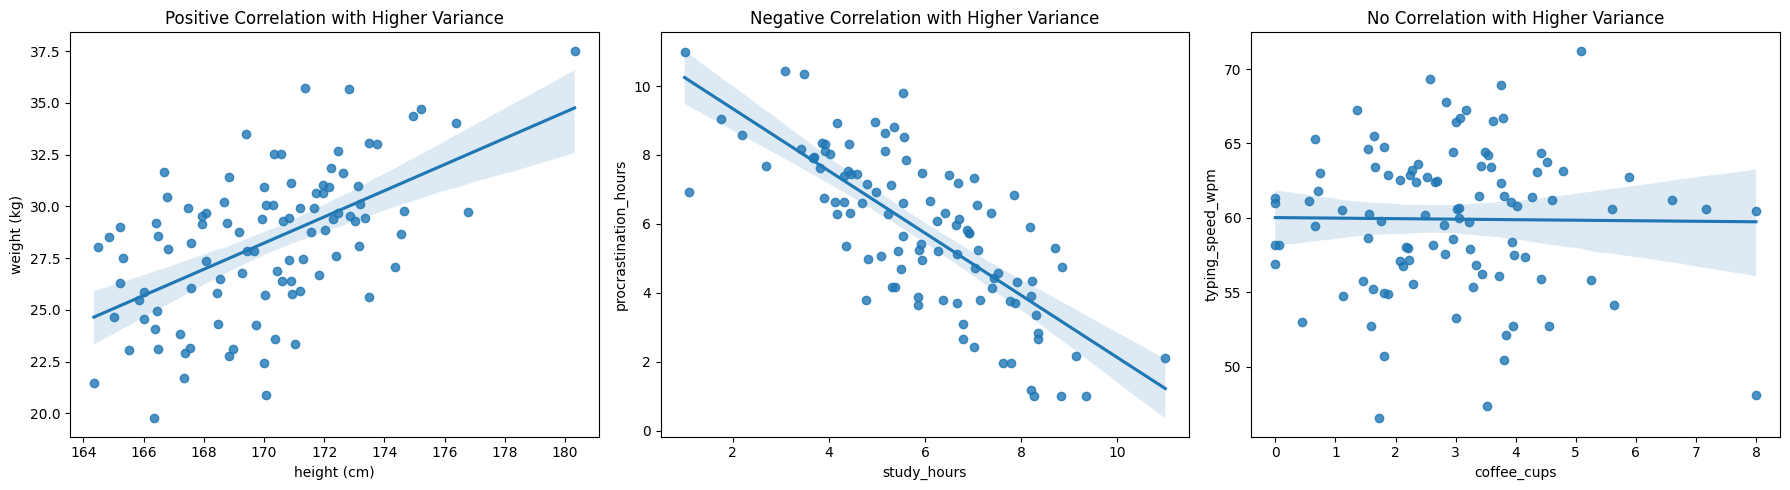

In [9]:
# Visualize the larger datasets with different variances
plt.figure(figsize=(18, 5))

# Plot 1: Positive correlation with more variance
plt.subplot(1, 3, 1)
sns.regplot(x="height (cm)", y="weight (kg)", data=large_positive_df)
plt.title("Positive Correlation with Higher Variance")

# Plot 2: Negative correlation with more variance
plt.subplot(1, 3, 2)
sns.regplot(x="study_hours", y="procrastination_hours", data=large_negative_df)
plt.title("Negative Correlation with Higher Variance")

# Plot 3: No correlation with more variance
plt.subplot(1, 3, 3)
sns.regplot(x="coffee_cups", y="typing_speed_wpm", data=large_no_corr_df)
plt.title("No Correlation with Higher Variance")

plt.tight_layout()
plt.show()

## Distribution Analysis with Histograms

Let's visualize the distribution of each variable using histograms to show their normal distributions.

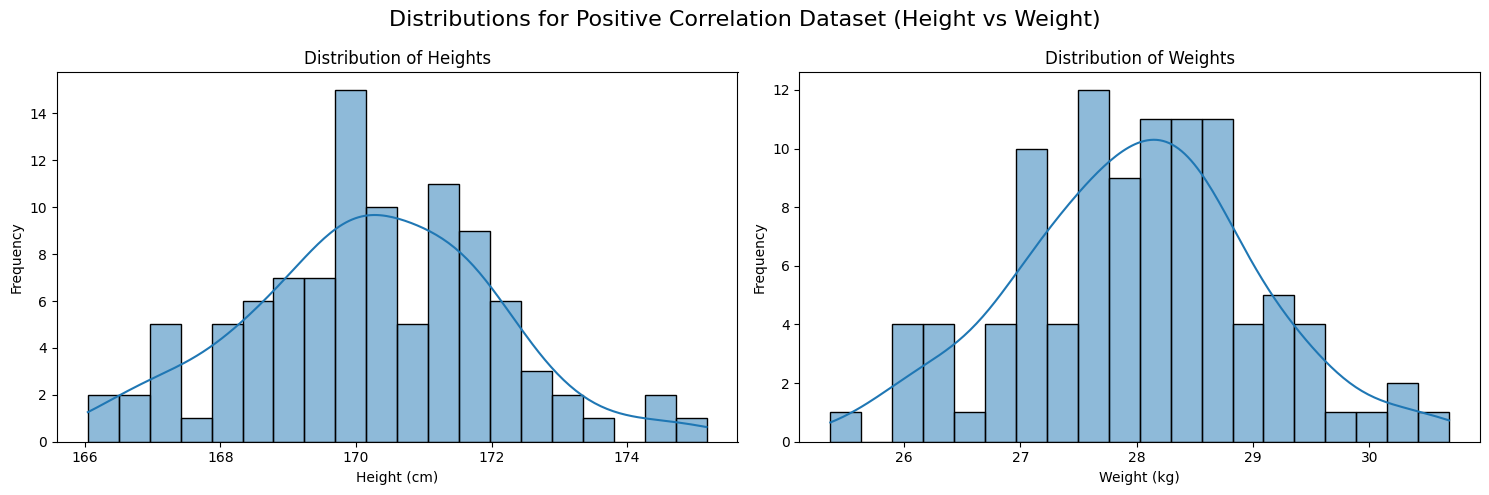

In [10]:
# Create figure for positive correlation dataset histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(
    "Distributions for Positive Correlation Dataset (Height vs Weight)", fontsize=16
)

# Plot histogram of heights
sns.histplot(positive_df["height (cm)"], kde=True, ax=axes[0], bins=20)
axes[0].set_title("Distribution of Heights")
axes[0].set_xlabel("Height (cm)")
axes[0].set_ylabel("Frequency")

# Plot histogram of weights
sns.histplot(positive_df["weight (kg)"], kde=True, ax=axes[1], bins=20)
axes[1].set_title("Distribution of Weights")
axes[1].set_xlabel("Weight (kg)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

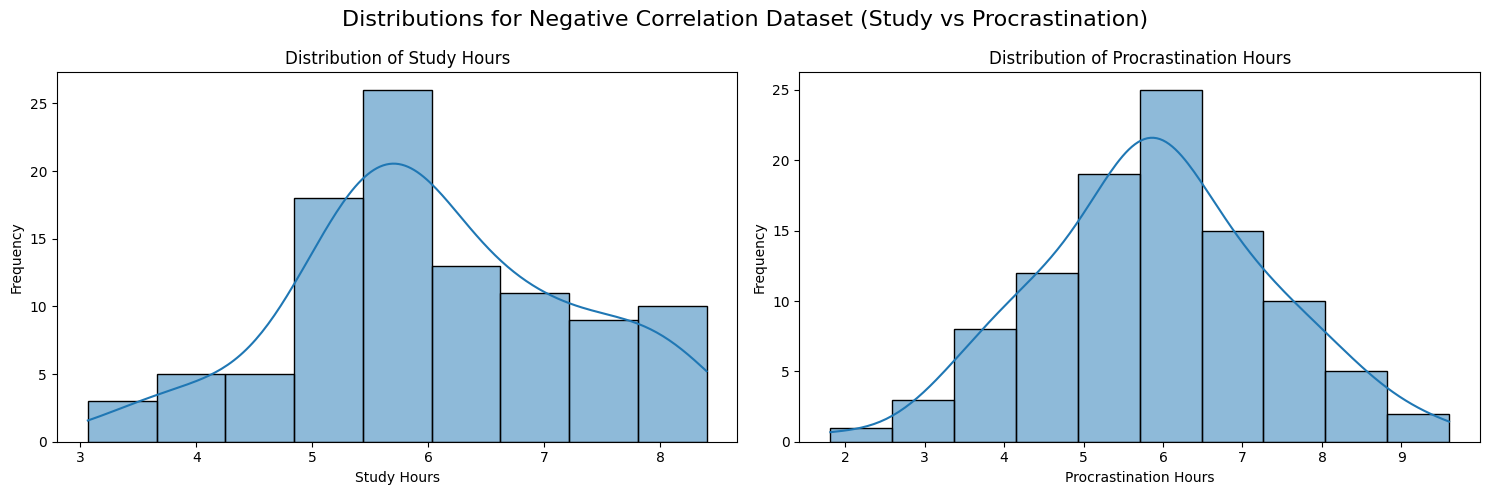

In [11]:
# Create figure for negative correlation dataset histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(
    "Distributions for Negative Correlation Dataset (Study vs Procrastination)",
    fontsize=16,
)

# Plot histogram of study hours
sns.histplot(negative_df["study_hours"], kde=True, ax=axes[0])
axes[0].set_title("Distribution of Study Hours")
axes[0].set_xlabel("Study Hours")
axes[0].set_ylabel("Frequency")

# Plot histogram of procrastination hours
sns.histplot(negative_df["procrastination_hours"], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Procrastination Hours")
axes[1].set_xlabel("Procrastination Hours")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

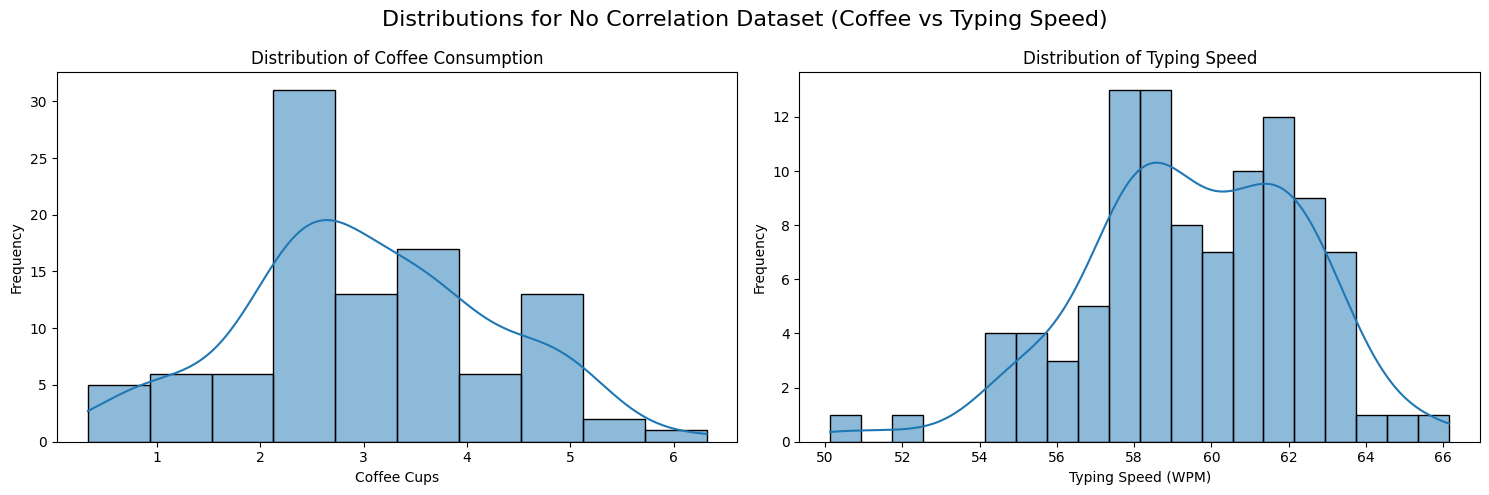

In [12]:
# Create figure for no correlation dataset histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(
    "Distributions for No Correlation Dataset (Coffee vs Typing Speed)", fontsize=16
)

# Plot histogram of coffee consumption
sns.histplot(no_corr_df["coffee_cups"], kde=True, ax=axes[0])
axes[0].set_title("Distribution of Coffee Consumption")
axes[0].set_xlabel("Coffee Cups")
axes[0].set_ylabel("Frequency")

# Plot histogram of typing speed
sns.histplot(no_corr_df["typing_speed_wpm"], kde=True, ax=axes[1], bins=20)
axes[1].set_title("Distribution of Typing Speed")
axes[1].set_xlabel("Typing Speed (WPM)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## Combined Visualization: Scatter Plots with Marginal Histograms

Let's create more sophisticated visualizations that show both the correlation scatter plot and the distributions of each variable.

In [13]:
# Function to create scatter plot with marginal histograms
def plot_scatter_with_histograms(x, y, x_label, y_label, title):
    # Create the joint plot - using jointplot instead of JointGrid for simpler API
    g = sns.jointplot(
        x=x, y=y, height=6, ratio=3, marginal_kws=dict(bins=20, fill=True)
    )

    # Add labels and title
    g.set_axis_labels(x_label, y_label)
    plt.subplots_adjust(top=0.9)  # Make space for the title
    plt.suptitle(title, fontsize=16)

    return g

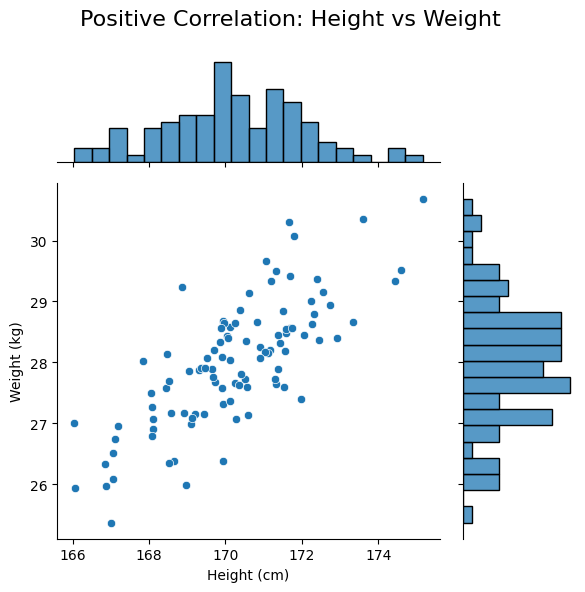

In [14]:
# Plot for positive correlation
plot_scatter_with_histograms(
    positive_df["height (cm)"],
    positive_df["weight (kg)"],
    "Height (cm)",
    "Weight (kg)",
    "Positive Correlation: Height vs Weight",
)

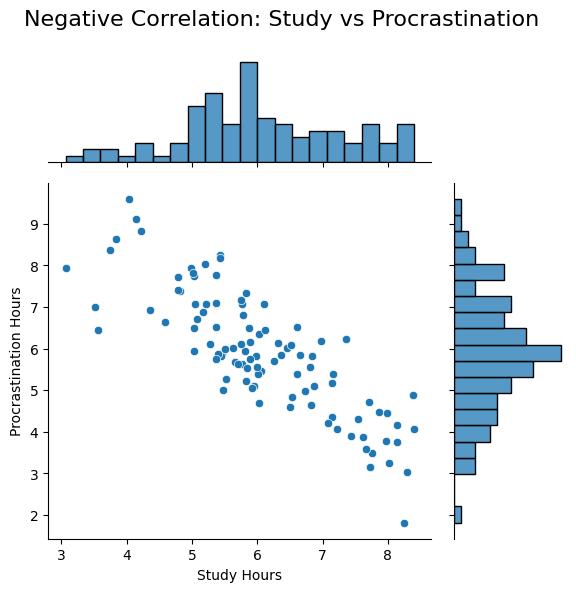

In [15]:
# Plot for negative correlation
plot_scatter_with_histograms(
    negative_df["study_hours"],
    negative_df["procrastination_hours"],
    "Study Hours",
    "Procrastination Hours",
    "Negative Correlation: Study vs Procrastination",
)

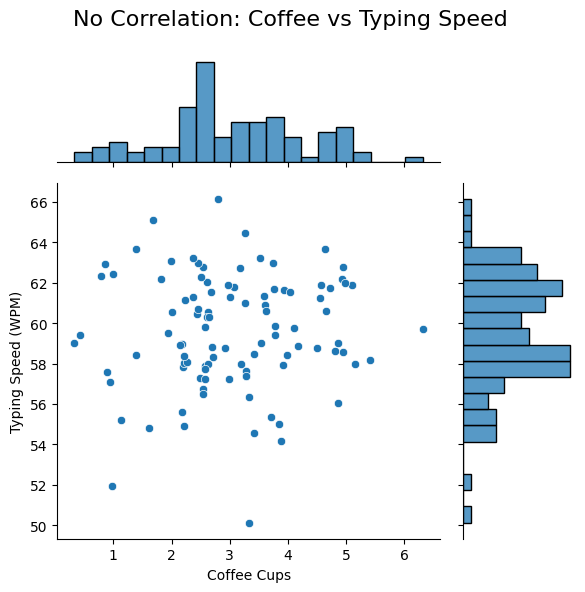

In [16]:
# Plot for no correlation
plot_scatter_with_histograms(
    no_corr_df["coffee_cups"],
    no_corr_df["typing_speed_wpm"],
    "Coffee Cups",
    "Typing Speed (WPM)",
    "No Correlation: Coffee vs Typing Speed",
)

## Correlation Matrix Visualization

Let's visualize the correlation matrices for our datasets to better understand the relationships.

In [17]:
# Create a function to plot correlation matrix
def plot_correlation_matrix(df, title):
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create a figure
    plt.figure(figsize=(8, 6))

    # Create a heatmap
    sns.heatmap(
        corr_matrix,
        annot=True,  # Show the correlation coefficients
        cmap="coolwarm",  # Color map
        vmin=-1,
        vmax=1,  # Fix the range from -1 to 1
        fmt=".2f",  # Format the numbers to 2 decimal places
        linewidths=0.5,  # Width of the grid lines
    )

    # Add title
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

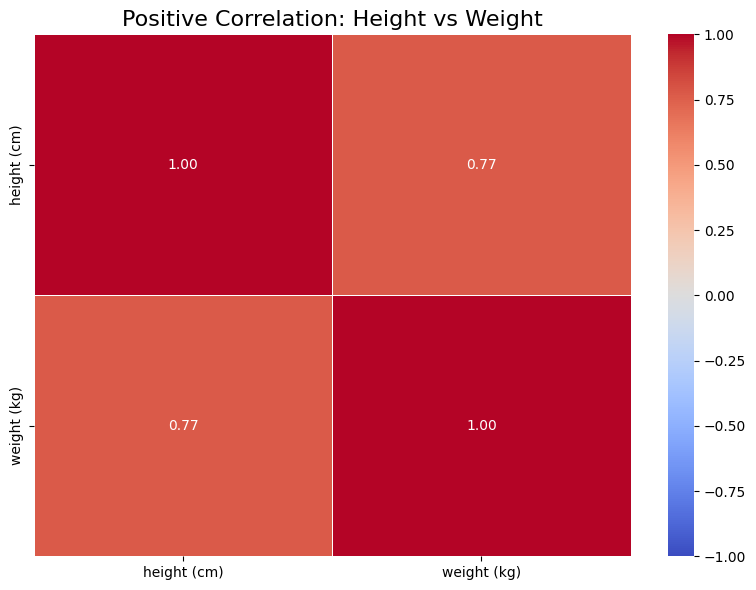

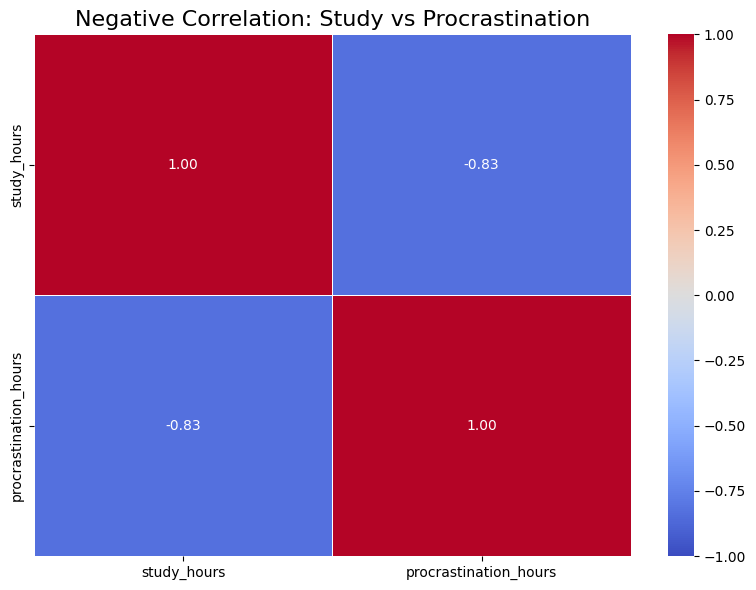

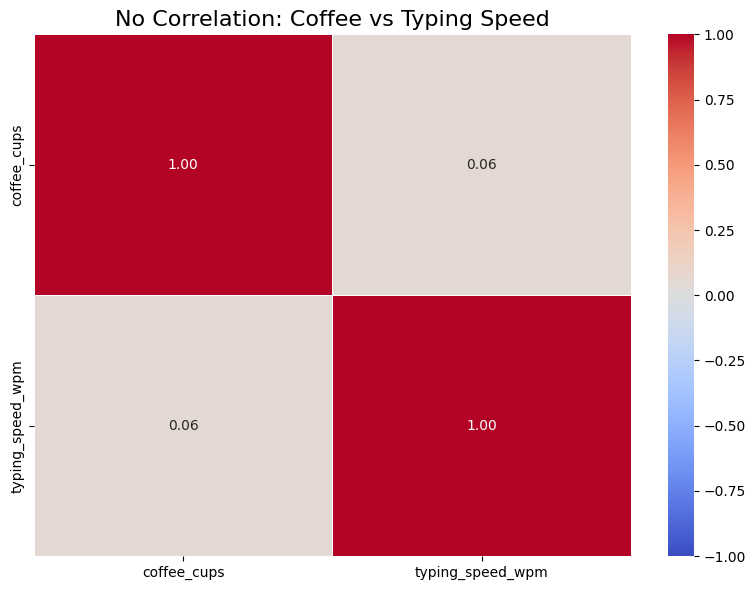

In [18]:
# Plot correlation matrices for each dataset
plot_correlation_matrix(positive_df, "Positive Correlation: Height vs Weight")
plot_correlation_matrix(negative_df, "Negative Correlation: Study vs Procrastination")
plot_correlation_matrix(no_corr_df, "No Correlation: Coffee vs Typing Speed")

## Updated Normal Distribution Comparison

Let's improve our normal distribution comparison with clearer visualizations and explanations.

In [19]:
def compare_to_normal_improved(data, title, figsize=(12, 5), bins=20):
    """Compare actual data distribution to a perfect normal distribution with better visualization"""
    # Calculate mean and standard deviation of the data
    mean = np.mean(data)
    std = np.std(data)

    # Create a range of x values for the normal distribution
    x = np.linspace(min(data) - 1, max(data) + 1, 1000)

    # Create a normal distribution with same mean and std
    y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)

    # Create figure
    plt.figure(figsize=figsize)

    # Plot histogram of actual data with density=True to make comparable to PDF
    hist = sns.histplot(
        data, kde=False, stat="density", label="Actual Data", bins=bins, alpha=0.6
    )

    # Plot the theoretical normal distribution
    plt.plot(x, y, "r-", label="Perfect Normal Distribution", linewidth=2)

    # Add mean and standard deviation lines
    plt.axvline(
        mean, color="green", linestyle="--", alpha=0.7, label=f"Mean = {mean:.2f}"
    )
    plt.axvline(
        mean + std, color="orange", linestyle=":", alpha=0.7, label=f"Mean ± 1σ"
    )
    plt.axvline(mean - std, color="orange", linestyle=":", alpha=0.7)

    # Add labels and legend
    plt.title(f"{title}\nComparison with Normal Distribution")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()

    # Add text with standard deviation
    plt.text(
        0.02,
        0.95,
        f"Standard deviation (σ) = {std:.2f}",
        transform=plt.gca().transAxes,
        bbox=dict(facecolor="white", alpha=0.8),
    )

    plt.show()

    return mean, std

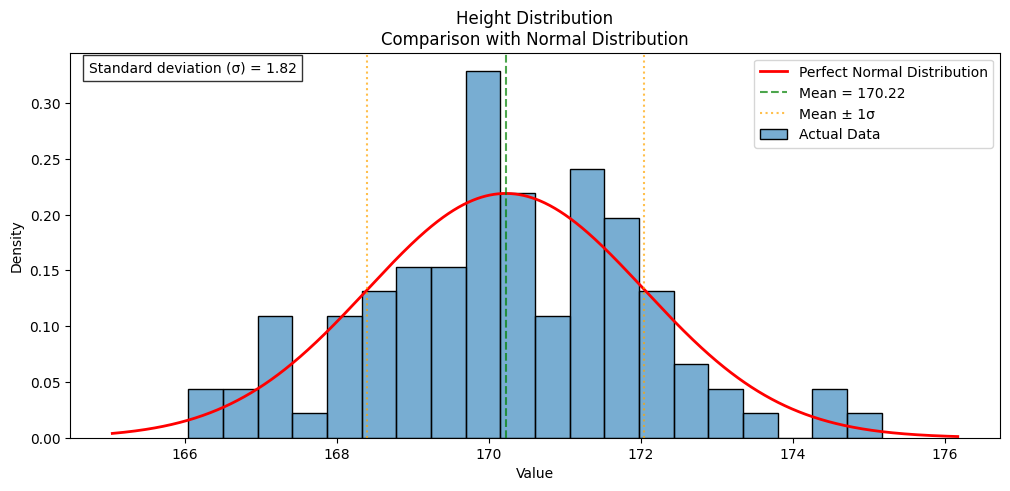

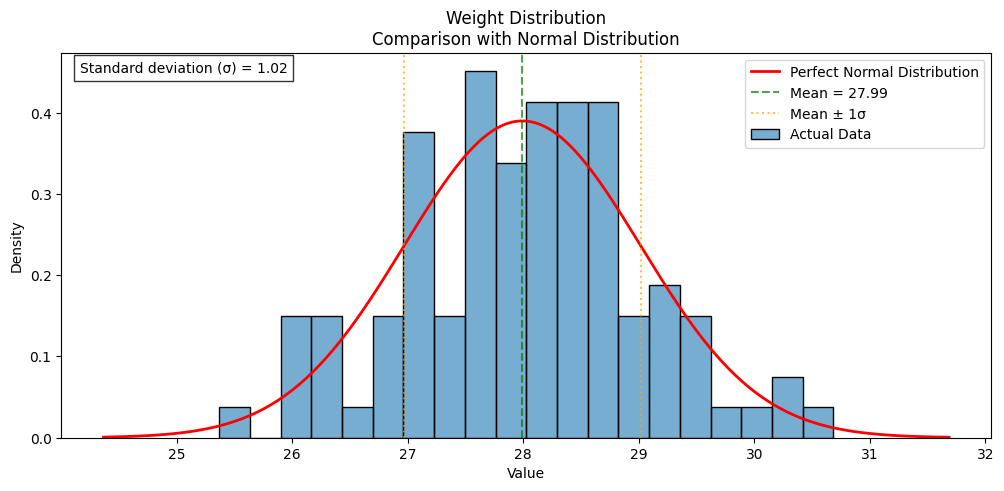

(27.992276664535584, 1.0228447686774387)

In [20]:
# Compare distributions with improved visualization
compare_to_normal_improved(positive_df["height (cm)"], "Height Distribution")
compare_to_normal_improved(positive_df["weight (kg)"], "Weight Distribution")

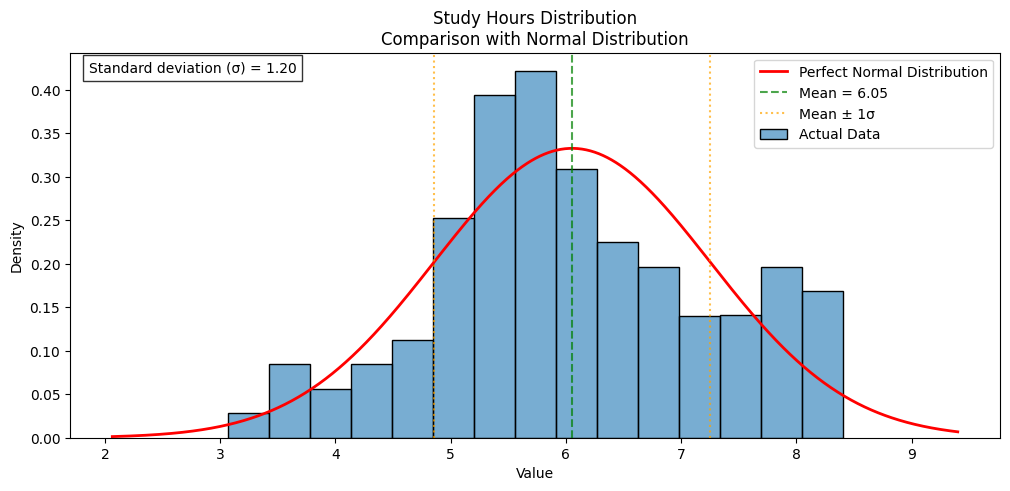

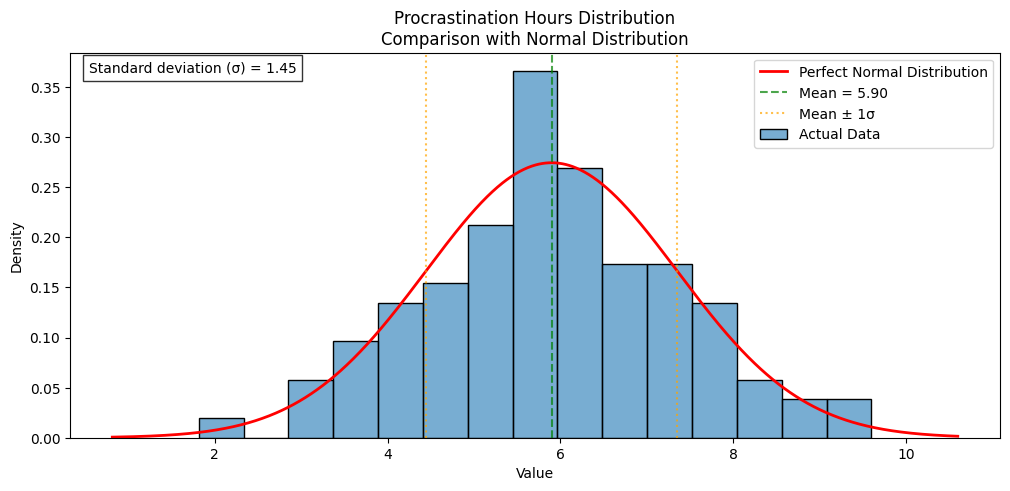

(5.898091792120408, 1.453386013235761)

In [21]:
# Compare the negative correlation dataset distributions
compare_to_normal_improved(
    negative_df["study_hours"], "Study Hours Distribution", bins=15
)
compare_to_normal_improved(
    negative_df["procrastination_hours"], "Procrastination Hours Distribution", bins=15
)

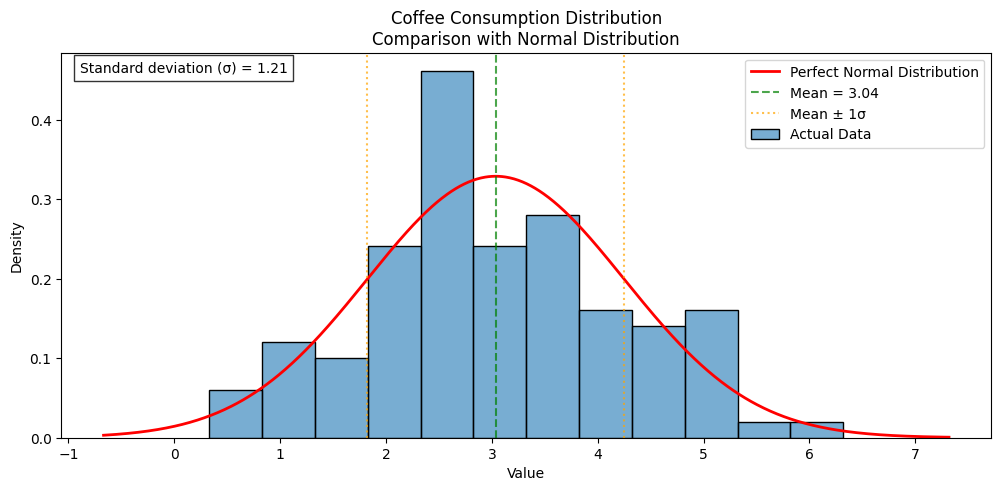

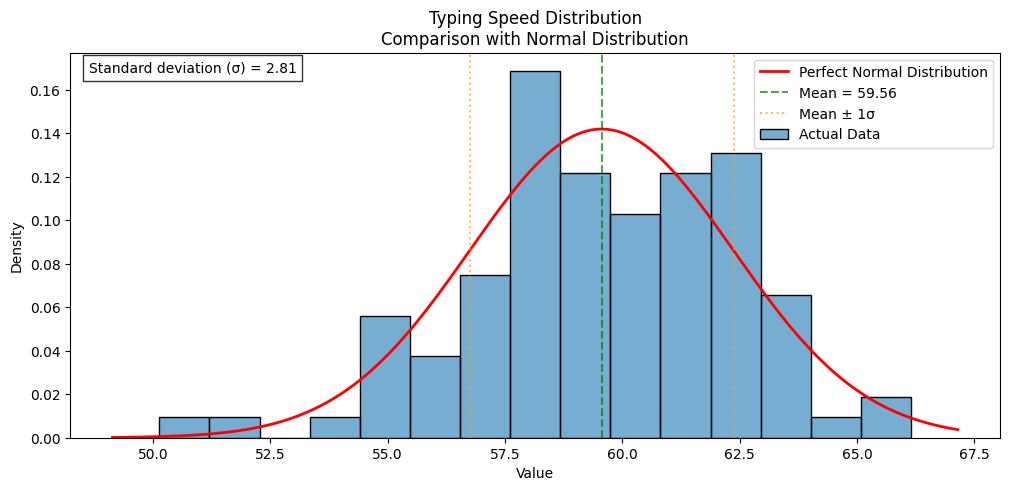

(59.558881416530184, 2.811469092982484)

In [22]:
# Compare the no correlation dataset distributions
compare_to_normal_improved(
    no_corr_df["coffee_cups"], "Coffee Consumption Distribution", bins=12
)
compare_to_normal_improved(
    no_corr_df["typing_speed_wpm"], "Typing Speed Distribution", bins=15
)

## Quantile-Quantile (Q-Q) Plots

Q-Q plots help us visualize how closely our data follows a normal distribution by comparing the quantiles of our data to the theoretical quantiles of a normal distribution.

In [23]:
import scipy.stats as stats


# Create a function to generate Q-Q plots
def create_qq_plot(data, title):
    plt.figure(figsize=(10, 6))

    # Create the Q-Q plot
    stats.probplot(data, dist="norm", plot=plt)

    # Add title
    plt.title(f"Q-Q Plot: {title}")
    plt.tight_layout()
    plt.show()

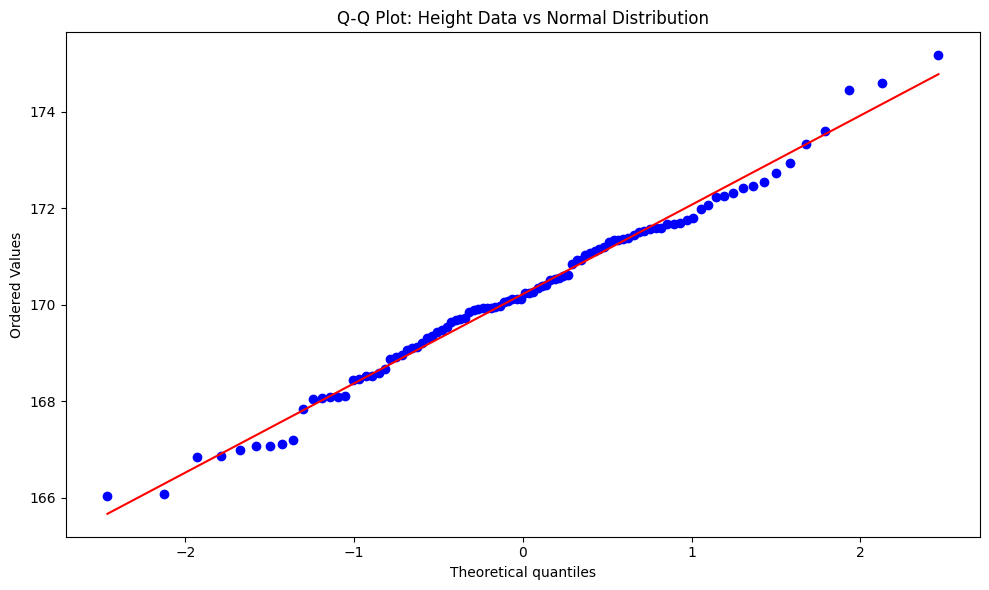

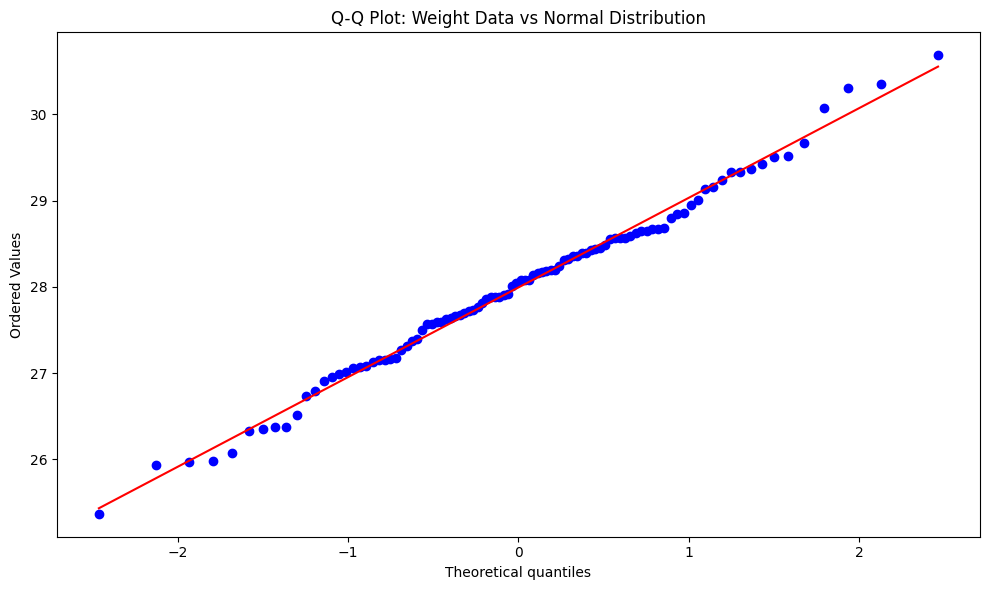

In [24]:
# Create Q-Q plots for each variable
create_qq_plot(positive_df["height (cm)"], "Height Data vs Normal Distribution")
create_qq_plot(positive_df["weight (kg)"], "Weight Data vs Normal Distribution")

## Comparing Normal Distribution to Actual Data

Let's plot the actual distributions alongside a perfect normal distribution to see how well they match.

In [25]:
def compare_to_normal(data, title, figsize=(12, 5)):
    """Compare actual data distribution to a perfect normal distribution"""
    # Calculate mean and standard deviation of the data
    mean = np.mean(data)
    std = np.std(data)

    # Create a range of x values for the normal distribution
    x = np.linspace(min(data) - 1, max(data) + 1, 100)

    # Create a normal distribution with same mean and std
    y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)

    # Create figure
    plt.figure(figsize=figsize)

    # Plot histogram of actual data with density=True to make comparable to PDF
    sns.histplot(data, kde=True, stat="density", label="Actual Data")

    # Plot the theoretical normal distribution
    plt.plot(x, y, "r-", label="Perfect Normal Distribution")

    # Add labels and legend
    plt.title(f"{title}\nComparison with Normal Distribution")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()

    plt.show()

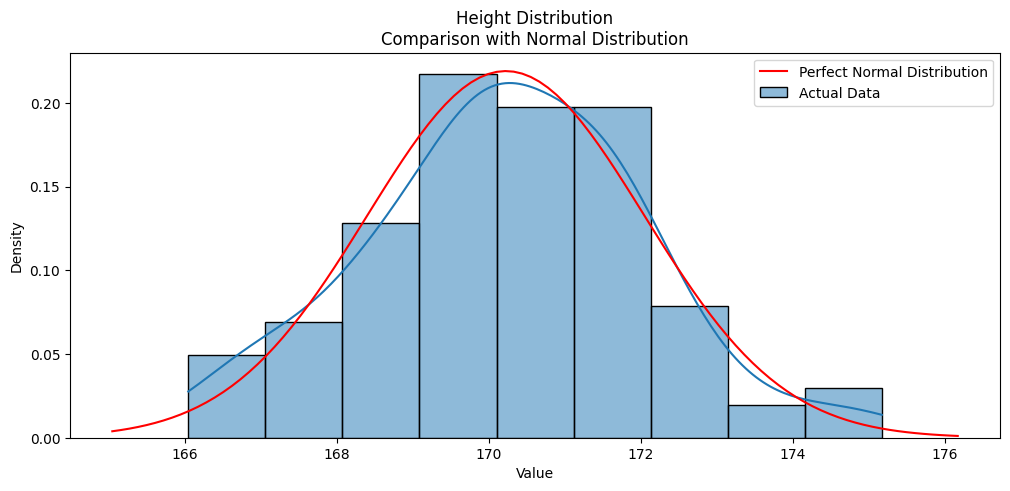

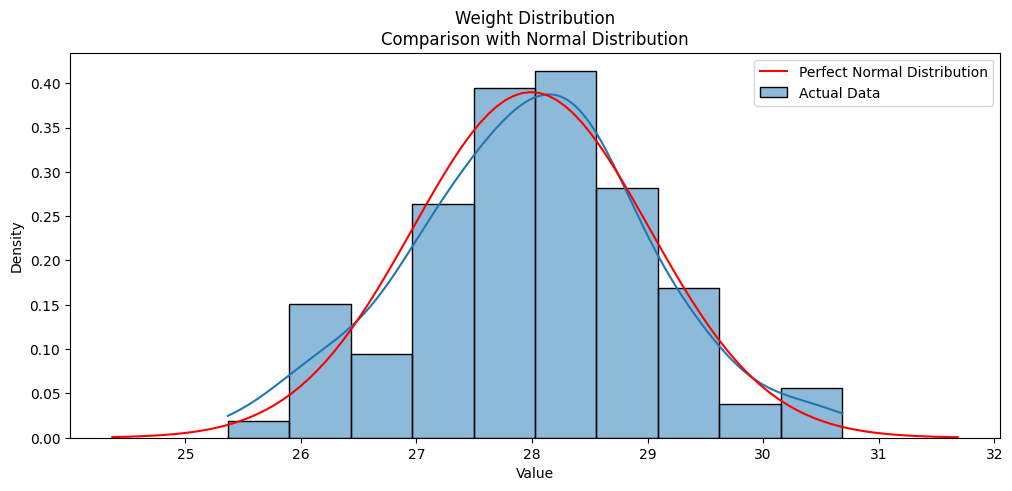

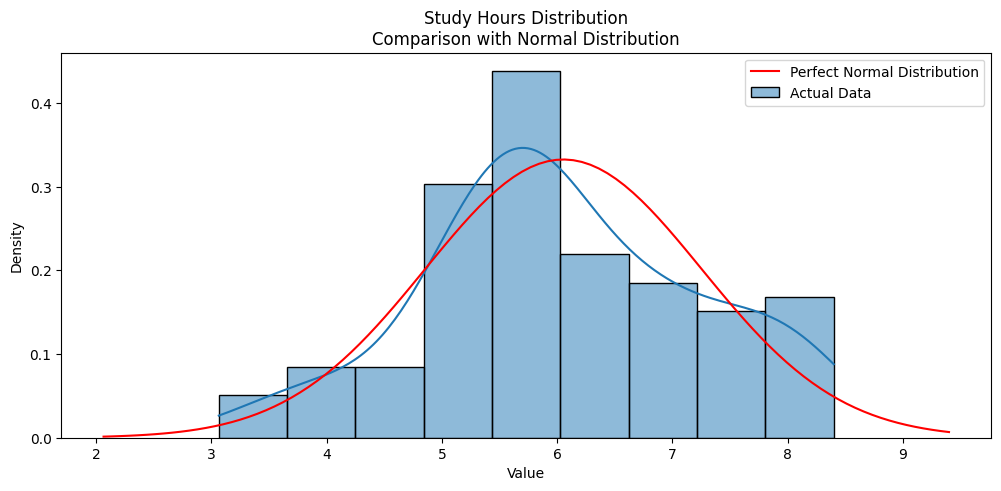

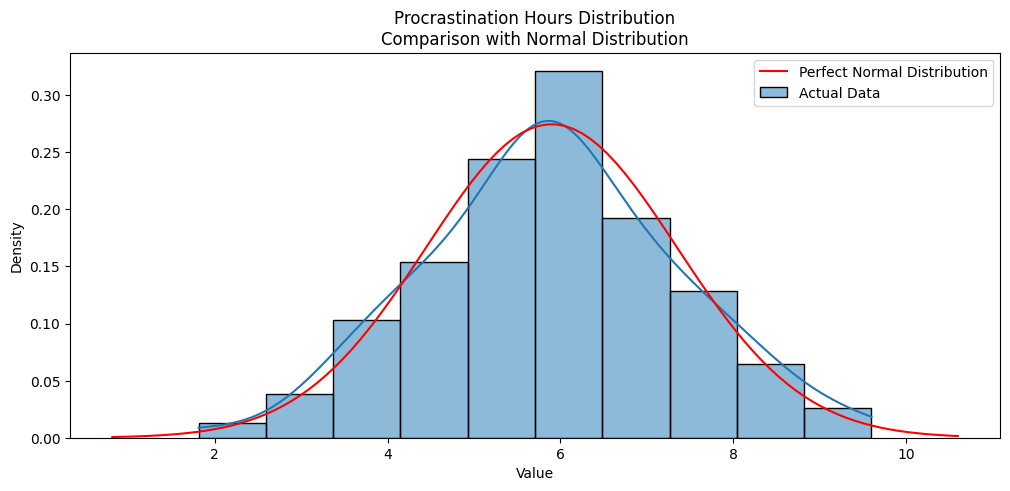

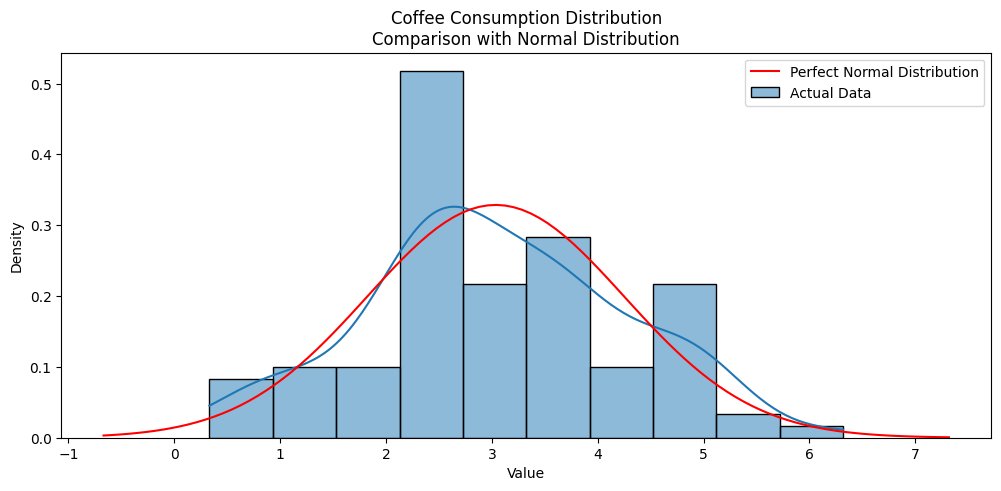

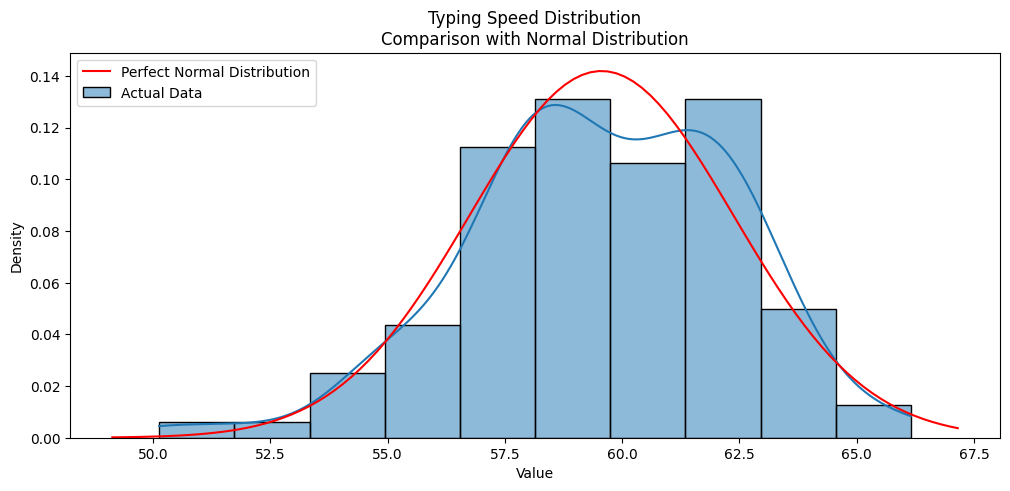

In [26]:
# Compare actual distributions to perfect normal distributions
compare_to_normal(positive_df["height (cm)"], "Height Distribution")
compare_to_normal(positive_df["weight (kg)"], "Weight Distribution")
compare_to_normal(negative_df["study_hours"], "Study Hours Distribution")
compare_to_normal(
    negative_df["procrastination_hours"], "Procrastination Hours Distribution"
)
compare_to_normal(no_corr_df["coffee_cups"], "Coffee Consumption Distribution")
compare_to_normal(no_corr_df["typing_speed_wpm"], "Typing Speed Distribution")

## Educational Notes on Normal Distribution

The normal distribution (also called the Gaussian distribution) is characterized by:

1. **Bell-shaped curve**: The highest frequency is at the mean, with decreasing frequency as values deviate from the mean
2. **Symmetry**: The distribution is symmetric about the mean
3. **Mean = Median = Mode**: These three measures of central tendency are equal in a perfect normal distribution
4. **Standard deviation**: Approximately 68% of data falls within one standard deviation of the mean, 95% within two standard deviations, and 99.7% within three standard deviations (the 68-95-99.7 rule)

In our simulated data:
- We use `np.random.normal()` to generate random values with a normal distribution
- The first parameter specifies the mean (center) of the distribution
- The second parameter specifies the standard deviation (spread) of the distribution
- The third parameter specifies how many values to generate

For example: `heights = np.random.normal(170, np.sqrt(height_variance) * 10, n_observations)` generates height values centered around 170 cm with a spread determined by the square root of height_variance multiplied by 10.

## Pure Python Implementation of Correlation Calculation

Let's implement the Pearson correlation coefficient formula using pure Python to understand the mathematical calculation behind correlation.

In [27]:
def calculate_correlation_pure_python(x, y):
    """
    Calculate the Pearson correlation coefficient between two arrays using pure Python.

    Parameters:
    - x: first array of values
    - y: second array of values (must be same length as x)

    Returns:
    - Pearson correlation coefficient (-1 to 1)
    """
    # Verify inputs have same length
    if len(x) != len(y):
        raise ValueError("Input arrays must have the same length")

    n = len(x)

    # Step 1: Calculate means
    mean_x = sum(x) / n
    mean_y = sum(y) / n

    # Step 2: Calculate deviations from mean
    dev_x = [i - mean_x for i in x]
    dev_y = [i - mean_y for i in y]

    # Step 3: Calculate sum of products of deviations
    sum_products = sum(dx * dy for dx, dy in zip(dev_x, dev_y))

    # Step 4: Calculate standard deviations
    sum_sq_x = sum(dx * dx for dx in dev_x)
    sum_sq_y = sum(dy * dy for dy in dev_y)

    # Step 5: Calculate correlation coefficient
    # Avoid division by zero
    if sum_sq_x == 0 or sum_sq_y == 0:
        return 0

    correlation = sum_products / (sum_sq_x**0.5 * sum_sq_y**0.5)

    return correlation

In [28]:
# Compare our pure Python correlation with pandas/NumPy implementation

# For positive correlation dataset
heights = positive_df["height (cm)"].tolist()
weights = positive_df["weight (kg)"].tolist()
pure_corr_positive = calculate_correlation_pure_python(heights, weights)
pandas_corr_positive = positive_df["height (cm)"].corr(positive_df["weight (kg)"])

print("Positive correlation (height vs weight):")
print(f"\tPure Python implementation: {pure_corr_positive:.4f}")
print(f"\tPandas implementation: {pandas_corr_positive:.4f}")
print(f"\tDifference: {abs(pure_corr_positive - pandas_corr_positive):.8f}")
print()

Positive correlation (height vs weight):
	Pure Python implementation: 0.7700
	Pandas implementation: 0.7700
	Difference: 0.00000000



In [29]:
# For negative correlation dataset
study_hours = negative_df["study_hours"].tolist()
procrastination_hours = negative_df["procrastination_hours"].tolist()
pure_corr_negative = calculate_correlation_pure_python(
    study_hours, procrastination_hours
)
pandas_corr_negative = negative_df["study_hours"].corr(
    negative_df["procrastination_hours"]
)

print("Negative correlation (study vs procrastination):")
print(f"\tPure Python implementation: {pure_corr_negative:.4f}")
print(f"\tPandas implementation: {pandas_corr_negative:.4f}")
print(f"\tDifference: {abs(pure_corr_negative - pandas_corr_negative):.8f}")
print()

Negative correlation (study vs procrastination):
	Pure Python implementation: -0.8300
	Pandas implementation: -0.8300
	Difference: 0.00000000



In [30]:
# For no correlation dataset
coffee_cups = no_corr_df["coffee_cups"].tolist()
typing_speed = no_corr_df["typing_speed_wpm"].tolist()
pure_corr_no_corr = calculate_correlation_pure_python(coffee_cups, typing_speed)
pandas_corr_no_corr = no_corr_df["coffee_cups"].corr(no_corr_df["typing_speed_wpm"])

print("No correlation (coffee vs typing speed):")
print(f"\tPure Python implementation: {pure_corr_no_corr:.4f}")
print(f"\tPandas implementation: {pandas_corr_no_corr:.4f}")
print(f"\tDifference: {abs(pure_corr_no_corr - pandas_corr_no_corr):.8f}")

No correlation (coffee vs typing speed):
	Pure Python implementation: 0.0594
	Pandas implementation: 0.0594
	Difference: 0.00000000


## Step-by-Step Correlation Calculation Example

Let's walk through a simplified example of calculating correlation by hand to illustrate the formula and process.

In [31]:
# Create small sample dataset for demonstration
sample_x = [5, 7, 9, 11, 13]  # Small set of x values
sample_y = [8, 9, 11, 14, 16]  # Corresponding y values with positive correlation

# Use our function to calculate correlation
sample_corr = calculate_correlation_pure_python(sample_x, sample_y)

print(f"Sample correlation coefficient: {sample_corr:.4f}\n")

# Now let's show the step-by-step calculation
n = len(sample_x)
mean_x = sum(sample_x) / n
mean_y = sum(sample_y) / n

print(f"Step 1: Calculate means")
print(f"\tMean of x = {mean_x}")
print(f"\tMean of y = {mean_y}\n")

# Deviations from means
dev_x = [i - mean_x for i in sample_x]
dev_y = [i - mean_y for i in sample_y]

print(f"Step 2: Calculate deviations from means")
print(f"\tx deviations: {dev_x}")
print(f"\ty deviations: {dev_y}\n")

# Products of deviations
products = [dx * dy for dx, dy in zip(dev_x, dev_y)]
sum_products = sum(products)

print(f"Step 3: Calculate products of deviations")
print(f"\tProducts: {products}")
print(f"\tSum of products: {sum_products}\n")

# Squared deviations
sq_dev_x = [dx * dx for dx in dev_x]
sq_dev_y = [dy * dy for dy in dev_y]
sum_sq_x = sum(sq_dev_x)
sum_sq_y = sum(sq_dev_y)

print(f"Step 4: Calculate squared deviations")
print(f"\tx² deviations: {sq_dev_x}")
print(f"\tSum of x² deviations: {sum_sq_x}")
print(f"\ty² deviations: {sq_dev_y}")
print(f"\tSum of y² deviations: {sum_sq_y}\n")

# Final calculation
correlation = sum_products / ((sum_sq_x**0.5) * (sum_sq_y**0.5))

print(f"Step 5: Calculate correlation coefficient")
print(f"\tr = sum_products / (sqrt(sum_sq_x) * sqrt(sum_sq_y))")
print(f"\tr = {sum_products} / (√{sum_sq_x} * √{sum_sq_y})")
print(f"\tr = {sum_products} / ({sum_sq_x ** 0.5:.4f} * {sum_sq_y ** 0.5:.4f})")
print(f"\tr = {sum_products} / {(sum_sq_x ** 0.5) * (sum_sq_y ** 0.5):.4f}")
print(f"\tr = {correlation:.4f}")

Sample correlation coefficient: 0.9878

Step 1: Calculate means
	Mean of x = 9.0
	Mean of y = 11.6

Step 2: Calculate deviations from means
	x deviations: [-4.0, -2.0, 0.0, 2.0, 4.0]
	y deviations: [-3.5999999999999996, -2.5999999999999996, -0.5999999999999996, 2.4000000000000004, 4.4]

Step 3: Calculate products of deviations
	Products: [14.399999999999999, 5.199999999999999, -0.0, 4.800000000000001, 17.6]
	Sum of products: 42.0

Step 4: Calculate squared deviations
	x² deviations: [16.0, 4.0, 0.0, 4.0, 16.0]
	Sum of x² deviations: 40.0
	y² deviations: [12.959999999999997, 6.759999999999998, 0.3599999999999996, 5.760000000000002, 19.360000000000003]
	Sum of y² deviations: 45.2

Step 5: Calculate correlation coefficient
	r = sum_products / (sqrt(sum_sq_x) * sqrt(sum_sq_y))
	r = 42.0 / (√40.0 * √45.2)
	r = 42.0 / (6.3246 * 6.7231)
	r = 42.0 / 42.5206
	r = 0.9878


## Visual Representation of Correlation Calculation

Let's create a visual representation of how correlation is calculated using our sample data.

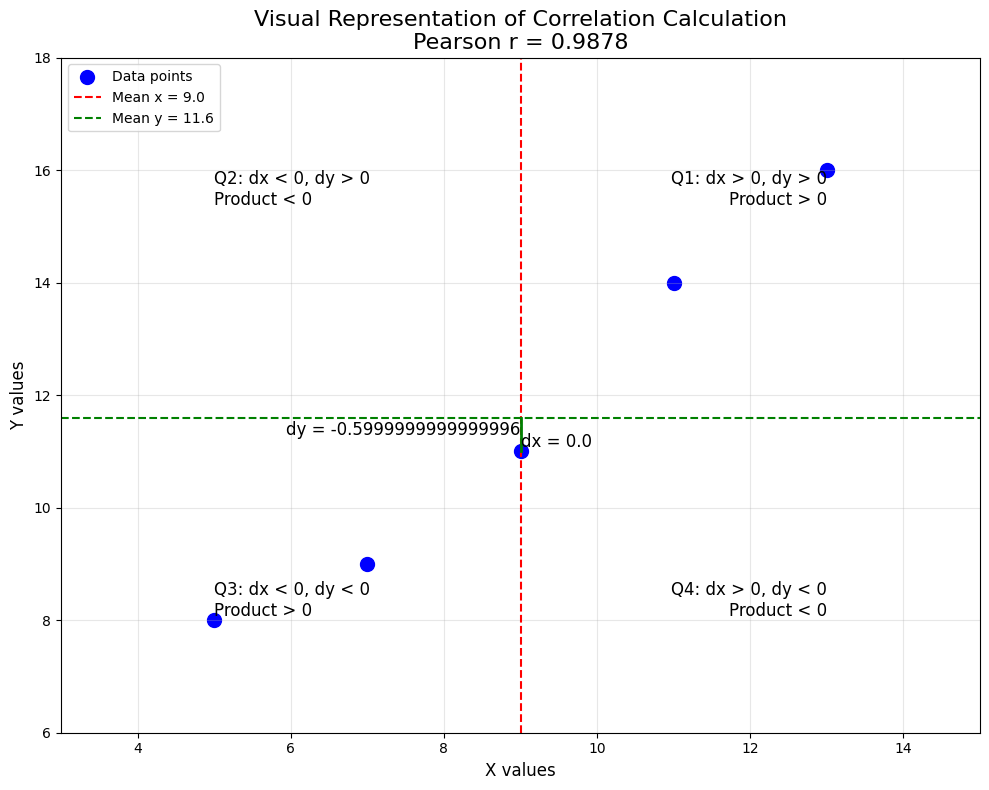

In [32]:
# Plot sample data with means and deviations
plt.figure(figsize=(10, 8))

# Plot the original points
plt.scatter(sample_x, sample_y, s=100, color="blue", label="Data points")

# Add mean lines
plt.axvline(mean_x, color="red", linestyle="--", label=f"Mean x = {mean_x}")
plt.axhline(mean_y, color="green", linestyle="--", label=f"Mean y = {mean_y}")

# Divide plot into quadrants based on means
plt.axvspan(
    min(sample_x) - 1,
    mean_x,
    min(sample_y) - 1,
    mean_y,
    alpha=0.1,
    color="red",
)
plt.axvspan(
    mean_x, max(sample_x) + 1, min(sample_y) - 1, mean_y, alpha=0.1, color="blue"
)
plt.axvspan(
    min(sample_x) - 1, mean_x, mean_y, max(sample_y) + 1, alpha=0.1, color="blue"
)
plt.axvspan(
    mean_x, max(sample_x) + 1, mean_y, max(sample_y) + 1, alpha=0.1, color="red"
)

# Show deviations for one point as an example
example_idx = 2  # Use the third point as an example
plt.plot(
    [sample_x[example_idx], sample_x[example_idx]],
    [sample_y[example_idx], mean_y],
    "g-",
    linewidth=2,
)
plt.plot(
    [sample_x[example_idx], mean_x],
    [sample_y[example_idx], sample_y[example_idx]],
    "r-",
    linewidth=2,
)

# Add text annotations
plt.text(
    sample_x[example_idx],
    (sample_y[example_idx] + mean_y) / 2,
    f"dy = {dev_y[example_idx]}",
    fontsize=12,
    ha="right",
)
plt.text(
    (sample_x[example_idx] + mean_x) / 2,
    sample_y[example_idx],
    f"dx = {dev_x[example_idx]}",
    fontsize=12,
    va="bottom",
)

# Add quadrant labels
plt.text(
    min(sample_x),
    min(sample_y),
    "Q3: dx < 0, dy < 0\nProduct > 0",
    fontsize=12,
    ha="left",
    va="bottom",
)
plt.text(
    max(sample_x),
    min(sample_y),
    "Q4: dx > 0, dy < 0\nProduct < 0",
    fontsize=12,
    ha="right",
    va="bottom",
)
plt.text(
    min(sample_x),
    max(sample_y),
    "Q2: dx < 0, dy > 0\nProduct < 0",
    fontsize=12,
    ha="left",
    va="top",
)
plt.text(
    max(sample_x),
    max(sample_y),
    "Q1: dx > 0, dy > 0\nProduct > 0",
    fontsize=12,
    ha="right",
    va="top",
)

# Set axis limits with some padding
plt.xlim(min(sample_x) - 2, max(sample_x) + 2)
plt.ylim(min(sample_y) - 2, max(sample_y) + 2)

# Add title, labels and legend
plt.title(
    f"Visual Representation of Correlation Calculation\nPearson r = {correlation:.4f}",
    fontsize=16,
)
plt.xlabel("X values", fontsize=12)
plt.ylabel("Y values", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

## The Pearson Correlation Formula

The Pearson correlation coefficient (r) measures the linear relationship between two variables. The formula is:

$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

Where:
- $x_i$ and $y_i$ are the individual data points
- $\bar{x}$ and $\bar{y}$ are the means of the x and y values
- $n$ is the number of data points

The correlation coefficient ranges from -1 to 1, where:
- 1 indicates a perfect positive linear relationship
- 0 indicates no linear relationship
- -1 indicates a perfect negative linear relationship

In our `calculate_correlation_pure_python` function, we followed these steps:
1. Calculate the means of both variables
2. Calculate deviations from the means
3. Calculate the sum of products of deviations (covariance)
4. Calculate the standard deviations
5. Divide the sum of products by the product of standard deviations

## Implementing and Comparing Different Correlation Methods

Let's implement Pearson's R correlation using both pure Python and scipy.stats, then compare them.

In [33]:
def pearson_r_pure_python(x, y):
    """
    Calculate Pearson's r correlation coefficient between two arrays using pure Python.
    This is the same as the Pearson correlation coefficient but with a different name.

    Parameters:
    - x: first array of values
    - y: second array of values (must be same length as x)

    Returns:
    - Pearson's r correlation coefficient (-1 to 1)
    """
    # This is the same formula as calculate_correlation_pure_python
    # Verify inputs have same length
    if len(x) != len(y):
        raise ValueError("Input arrays must have the same length")

    n = len(x)

    # Step 1: Calculate means
    mean_x = sum(x) / n
    mean_y = sum(y) / n

    # Step 2: Calculate numerator (sum of products of deviations)
    numerator = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))

    # Step 3: Calculate denominators (standard deviations)
    sum_sq_x = sum((x[i] - mean_x) ** 2 for i in range(n))
    sum_sq_y = sum((y[i] - mean_y) ** 2 for i in range(n))

    # Step 4: Combine to get Pearson's r
    # Avoid division by zero
    if sum_sq_x == 0 or sum_sq_y == 0:
        return 0

    pearson_r = numerator / (sum_sq_x**0.5 * sum_sq_y**0.5)

    return pearson_r

In [34]:
# Import scipy.stats for the official Pearson r implementation
import scipy.stats as stats

# Compare our implementation with scipy's implementation using the positive correlation dataset
heights = positive_df["height (cm)"].tolist()
weights = positive_df["weight (kg)"].tolist()

# Calculate using different methods
pure_python_r = pearson_r_pure_python(heights, weights)
scipy_r, scipy_p_value = stats.pearsonr(heights, weights)
pandas_corr = positive_df["height (cm)"].corr(positive_df["weight (kg)"])

print("Comparison of correlation calculations for height vs weight:")
print(f"  Pure Python Pearson's r: {pure_python_r:.6f}")
print(f"  SciPy Pearson's r:       {scipy_r:.6f} (p-value: {scipy_p_value:.6f})")
print(f"  Pandas correlation:      {pandas_corr:.6f}")
print(
    f"  Max difference:          {max(abs(pure_python_r - scipy_r), abs(pure_python_r - pandas_corr)):.10f}"
)

Comparison of correlation calculations for height vs weight:
  Pure Python Pearson's r: 0.770045
  SciPy Pearson's r:       0.770045 (p-value: 0.000000)
  Pandas correlation:      0.770045
  Max difference:          0.0000000000


In [35]:
# Compare methods on the negative correlation dataset
study_hours = negative_df["study_hours"].tolist()
procrastination_hours = negative_df["procrastination_hours"].tolist()

# Calculate using different methods
pure_python_r = pearson_r_pure_python(study_hours, procrastination_hours)
scipy_r, scipy_p_value = stats.pearsonr(study_hours, procrastination_hours)
pandas_corr = negative_df["study_hours"].corr(negative_df["procrastination_hours"])

print("Comparison of correlation calculations for study vs procrastination:")
print(f"  Pure Python Pearson's r: {pure_python_r:.6f}")
print(f"  SciPy Pearson's r:       {scipy_r:.6f} (p-value: {scipy_p_value:.6f})")
print(f"  Pandas correlation:      {pandas_corr:.6f}")
print(
    f"  Max difference:          {max(abs(pure_python_r - scipy_r), abs(pure_python_r - pandas_corr)):.10f}"
)

Comparison of correlation calculations for study vs procrastination:
  Pure Python Pearson's r: -0.830042
  SciPy Pearson's r:       -0.830042 (p-value: 0.000000)
  Pandas correlation:      -0.830042
  Max difference:          0.0000000000


## Understanding Correlation vs. Pearson's r

When we talk about 'correlation', we're often referring to Pearson's correlation coefficient (also called Pearson's r), but it's important to understand that there are actually several different types of correlation measures:

### Pearson's r
- Measures the **linear** relationship between two continuous variables
- Ranges from -1 to 1, where:
  * 1 indicates a perfect positive linear relationship
  * 0 indicates no linear relationship
  * -1 indicates a perfect negative linear relationship
- Assumes variables are normally distributed and have a linear relationship
- Is sensitive to outliers
- What we've implemented in our `pearson_r_pure_python` function

### Other Correlation Measures

#### Spearman's Rank Correlation
- Measures monotonic relationships (whether variables increase or decrease together, not necessarily linearly)
- Based on the ranks of data rather than actual values
- Less sensitive to outliers than Pearson's r
- Useful when data doesn't follow a normal distribution

#### Kendall's Tau
- Another rank-based correlation measure
- More robust with small sample sizes and when many tied ranks exist
- Often used for ordinal data

### Key Differences

When we talk about 'correlation' without specifying, we typically mean Pearson's correlation coefficient, but this distinction is important:

1. **Linearity**: Pearson's r only detects linear relationships, while other measures can detect non-linear relationships
2. **Data Types**: Pearson's r works best with continuous variables, while others like Spearman can handle ordinal data
3. **Assumptions**: Pearson's r assumes normality, while rank-based measures don't

In our notebook so far, we've been calculating Pearson's correlation coefficient throughout, whether using our pure Python implementation, pandas, or scipy.

## Comparing Different Types of Correlation Measures

Let's calculate different types of correlation coefficients for our datasets to see how they compare.

In [36]:
# Define a function to compare different correlation methods
def compare_correlation_methods(x, y, title):
    """Compare different correlation methods for two variables"""
    # Calculate correlations
    pearson_r, pearson_p = stats.pearsonr(x, y)
    spearman_r, spearman_p = stats.spearmanr(x, y)
    kendall_tau, kendall_p = stats.kendalltau(x, y)

    # Print results
    print(f"Correlation measures for {title}:")
    print(f"  Pearson's r:    {pearson_r:.4f} (p-value: {pearson_p:.4f})")
    print(f"  Spearman's rho: {spearman_r:.4f} (p-value: {spearman_p:.4f})")
    print(f"  Kendall's tau:  {kendall_tau:.4f} (p-value: {kendall_p:.4f})")
    print()

    # Plot the data
    plt.figure(figsize=(10, 4))
    plt.scatter(x, y, alpha=0.7)
    plt.title(
        f"{title}\nPearson r={pearson_r:.4f}, Spearman rho={spearman_r:.4f}, Kendall tau={kendall_tau:.4f}"
    )
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Correlation measures for Positive Correlation: Height vs Weight:
  Pearson's r:    0.7700 (p-value: 0.0000)
  Spearman's rho: 0.7483 (p-value: 0.0000)
  Kendall's tau:  0.5620 (p-value: 0.0000)



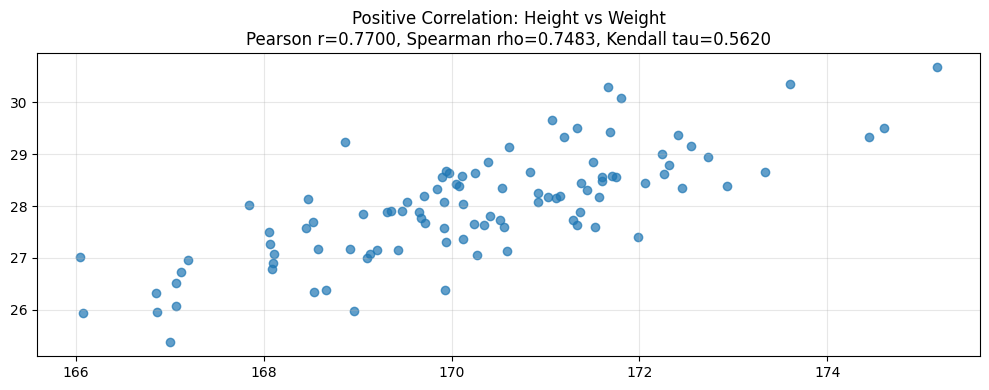

Correlation measures for Negative Correlation: Study Hours vs Procrastination:
  Pearson's r:    -0.8300 (p-value: 0.0000)
  Spearman's rho: -0.8245 (p-value: 0.0000)
  Kendall's tau:  -0.6291 (p-value: 0.0000)



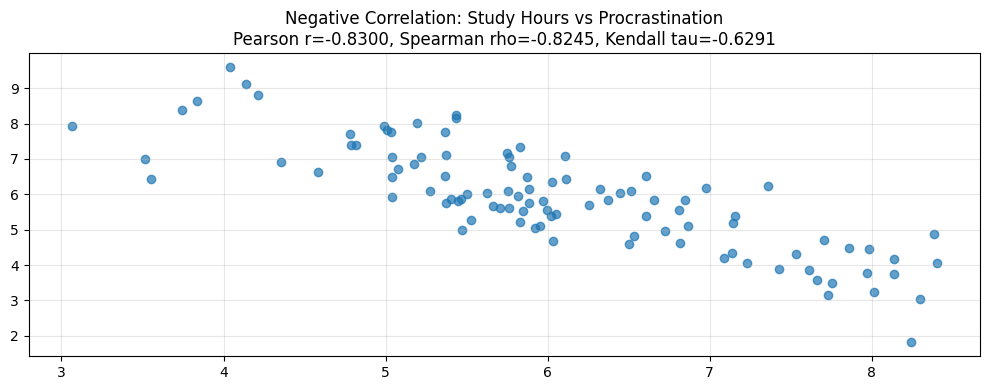

Correlation measures for No Correlation: Coffee Cups vs Typing Speed:
  Pearson's r:    0.0594 (p-value: 0.5573)
  Spearman's rho: 0.0473 (p-value: 0.6401)
  Kendall's tau:  0.0347 (p-value: 0.6085)



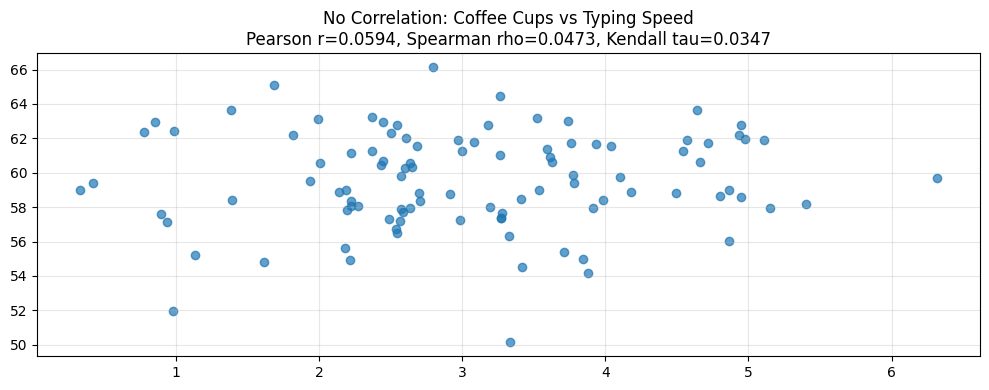

In [37]:
# Compare correlation methods on our three datasets
compare_correlation_methods(
    positive_df["height (cm)"].tolist(),
    positive_df["weight (kg)"].tolist(),
    "Positive Correlation: Height vs Weight",
)

compare_correlation_methods(
    negative_df["study_hours"].tolist(),
    negative_df["procrastination_hours"].tolist(),
    "Negative Correlation: Study Hours vs Procrastination",
)

compare_correlation_methods(
    no_corr_df["coffee_cups"].tolist(),
    no_corr_df["typing_speed_wpm"].tolist(),
    "No Correlation: Coffee Cups vs Typing Speed",
)

## Demonstration with Non-Linear Relationship

Let's create a dataset with a non-linear relationship to demonstrate when Pearson's r might be misleading and other correlation measures might be more appropriate.

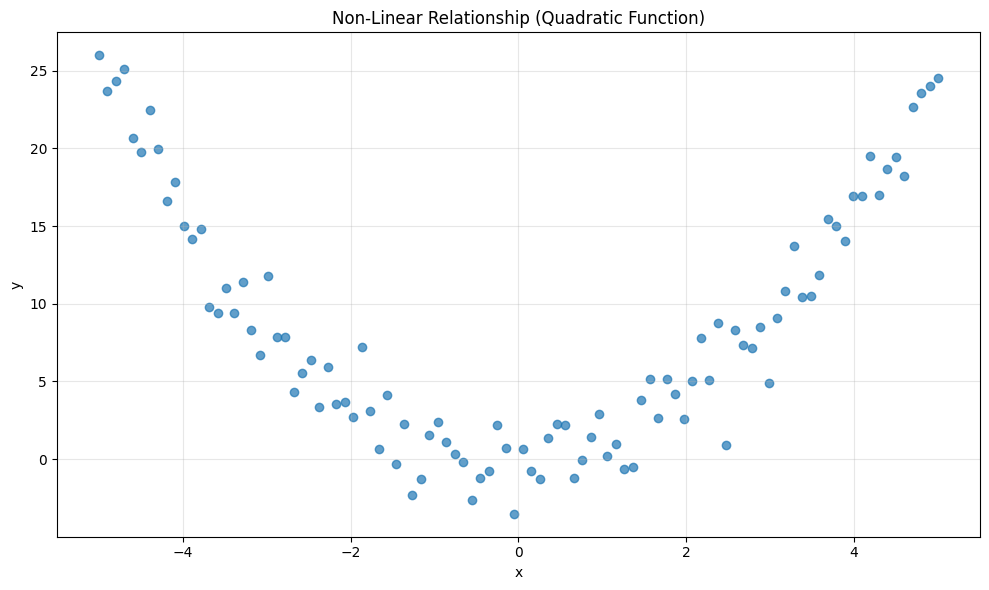

Correlation measures for Non-Linear Relationship:
  Pearson's r:    0.0102 (p-value: 0.9201)
  Spearman's rho: 0.0168 (p-value: 0.8680)
  Kendall's tau:  0.0190 (p-value: 0.7795)



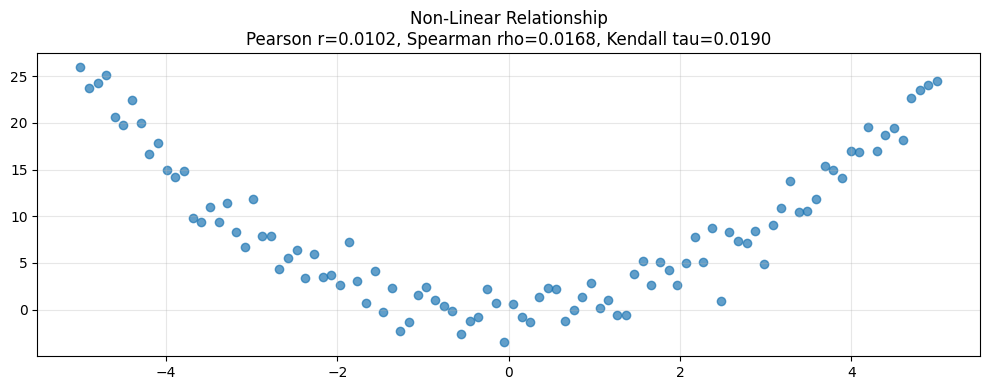

In [38]:
# Create a dataset with non-linear relationship (quadratic function)
np.random.seed(42)  # For reproducibility
x_nonlinear = np.linspace(-5, 5, 100)
y_nonlinear = x_nonlinear**2 + np.random.normal(0, 2, 100)

# Create a DataFrame for this non-linear relationship
nonlinear_df = pd.DataFrame({"x": x_nonlinear, "y": y_nonlinear})

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.scatter(nonlinear_df["x"], nonlinear_df["y"], alpha=0.7)
plt.title("Non-Linear Relationship (Quadratic Function)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Compare different correlation measures
compare_correlation_methods(
    nonlinear_df["x"].tolist(), nonlinear_df["y"].tolist(), "Non-Linear Relationship"
)

## When to Use Different Correlation Measures

Based on our examples, here are guidelines for when to use different correlation measures:

### Use Pearson's r when:
- You have continuous data
- The relationship appears linear
- Data is normally distributed
- You want to measure the strength of a linear relationship

### Use Spearman's rho when:
- The relationship is monotonic but not necessarily linear
- You have ordinal data or ranked data
- Your data contains outliers that might affect Pearson's r
- The data doesn't follow a normal distribution

### Use Kendall's tau when:
- You have a small sample size
- You have ordinal data
- There are many tied ranks in your data
- You want a measure that's more robust but less sensitive than Spearman's

### Key Points to Remember:

1. **A correlation of 0 doesn't mean no relationship** - it means no *linear* relationship (in the case of Pearson's r) or no *monotonic* relationship (in the case of Spearman/Kendall)

2. **Always visualize your data** - correlation coefficients alone can be misleading

3. **Consider the nature of your data** when choosing a correlation measure

4. **Correlation does not imply causation** - a strong correlation doesn't necessarily mean one variable causes changes in the other